# Use case

Description: For a patient with **disease X**, what are some factors (such as **genetic features**, comorbidities, etc) that could cause *sensitivity or resistance* to **drug Y**? 

In [1]:
from biothings_explorer.query.predict import Predict
from biothings_explorer.query.visualize import display_graph
import nest_asyncio
nest_asyncio.apply()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/Users/kevinxin/anaconda3/lib/python3.6/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Use Case 1: Mutations in what genes cause sensitivity to drug Y in patients with Lung Adenocarcinoma

### Step 1: Retrieve representation of Lung Adenocarcinoma in BTE

In [2]:
from biothings_explorer.hint import Hint
ht = Hint()
luad = ht.query("lung adenocarcinoma")['Disease'][0]
luad

{'MONDO': 'MONDO:0005061',
 'DOID': 'DOID:3910',
 'UMLS': 'C0152013',
 'name': 'lung adenocarcinoma',
 'MESH': 'C538231',
 'primary': {'identifier': 'MONDO',
  'cls': 'Disease',
  'value': 'MONDO:0005061'},
 'display': 'MONDO(MONDO:0005061) DOID(DOID:3910) UMLS(C0152013) MESH(C538231) name(lung adenocarcinoma)',
 'type': 'Disease'}

### Step 2: Use BTE to perform query

In [3]:
query_config = {
    "filters": [
        {
            "frequency": {
                ">": 0.1
            },
        }, 
        {
            "disease_context": {
                "=": "MONDO:0005061"
            },
            "pvalue": {
                "<": 0.05
            },
            "effect_size": {
                "<": 0.00
            }
        }
    ],
    "predicates": [None, None, "physically_interacts_with"]
}

In [4]:
pd = Predict(
    input_objs=[luad],
    intermediate_nodes =['Gene', 'ChemicalSubstance'], 
    output_types =['Gene'], 
    config=query_config
)
pd.connect(verbose=True)

========== QUERY PARAMETER SUMMARY ==========

Your query have 1 input nodes lung adenocarcinoma. And BTE will find paths that connect your input nodes to your output types ['Gene']. Paths will contain 2 intermediate nodes.

Intermediate node #1 will have these type constraints: Gene
Intermediate node #2 will have these type constraints: ChemicalSubstance

========== Query # 1 ==========

==== Step #1: Query Path Planning ====

BTE found 10 APIs

API 1. TCGA Mutation Frequency KP API (1 API calls)
API 2. Automat CORD19 Scigraph API (1 API calls)
API 3. mydisease.info API (1 API calls)
API 4. SEMMED Disease API (15 API calls)
API 5. MGIgene2phenotype API (1 API calls)
API 6. Automat CORD19 Scibite API (1 API calls)
API 7. BioLink API (2 API calls)
API 8. Automat PHAROS API (1 API calls)
API 9. DISEASES API (1 API calls)
API 10. CORD Disease API (1 API calls)


==== Step #2: Query path execution ====

NOTE: API requests are dispatched in parallel, so the list of APIs below is ordered by 

API 2.2 Drug Response KP API: 115 hits
API 2.2 Drug Response KP API: 4 hits after applying filters
API 2.3 Drug Response KP API: 61 hits
API 2.3 Drug Response KP API: 0 hits after applying filters
API 2.4 Drug Response KP API: 98 hits
API 2.4 Drug Response KP API: 1 hits after applying filters
API 12.4: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=TP53
API 12.4 DGIdb API: 108 hits
API 12.4 DGIdb API: 0 hits after applying filters
API 8.1: https://mychem.info/v1/query?fields=drugbank.id&size=250 (POST -d q=TG,HERC2,COL5A2,VCAN,ZNF804A,RP1L1,TSHZ3,FLG2,PRDM9,COL6A3,AHNAK2,LPHN3,SETBP1,FAT4,C1orf173,PKHD1,TENM2,EPHA5,LTBP1,UNC79,FBN2,GPR112,TLR4,NF1,CSMD3,KRAS,ABCA13,ASXL3,PEG3,FAT1,DNAH9,CRB1,ZNF831,MYH1,PKHD1L1,FAM135B,SI,PAPPA2,RYR1,COL11A1,PTPRZ1,KIAA1109,TENM1,CNTNAP2,DNAH7,PCDH10,ZNF536,CPS1,TNR,XIRP2,NRXN1,LPPR4,LAMA1,TTN,BRINP3,PCDH15,PXDNL,DST,ADAMTS12,CTNND2,CDH10,CDH12,FLG,TIAM1,TP53,CSMD2,MAGEC1,DNAH11,DNAH3,KMT2C,LRRC7,COL19A1,ASPM,FMN2,DCDC1,PCLO,ADAMTS20,APO

API 8.3 MyChem.info API: 83 hits
API 8.3 MyChem.info API: 0 hits after applying filters
API 11.1: https://biothings.ncats.io/semmedgene/query?fields=disrupted_by (POST -d q=C0694883,C0078193,C1420883,C1422786,C1416914,C0812248,C1426145,C1424250,C1418643,C1825094,C1417534,C1422360,C1420709,C1419114,C1422223,C1826746,C1415498,C2239427,C1422165,C1413683,C1422527,C1414100,C1537481,C1419126,C1413581,C0812278,C1419780,C1414104,C1416776,C1413268,C0146283,C1413801,C1424736,C1423850,C1416985,C1413823,C1420044,C1422390,C1412887,C1424874,C1413059,C1414313,C1426709,C1427969,C1412403,C1423898,C2239455,C1837877,C1426144,C1422175,C1413270,C1423682,C0040123,C2239906,C1826605,C1422331,C1414083,C1416913,C1418605,C1422830,C1415512,C1336636,C1421222,C1423585,C1417851,C1413701,C1412295,C1423594,C1417938,C1419337,C1539312,C1824069,C1538171,C1425978,C1416928,C1427920,C1420385,C1419778,C1417498,C0079419,C1427037,C1418452,C1427797,C1413570,C1421975,C1537502,C1537378,C1417656,C1425837,C1421175,C1417537,C1826602

API 5.8 OpenTarget API: 0 hits
API 5.8 OpenTarget API: 0 hits after applying filters
API 5.9: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000133703
API 5.9 OpenTarget API: 0 hits
API 5.9 OpenTarget API: 0 hits after applying filters
API 2.5: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:3845%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.5: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:7399%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.5 Drug Response KP API: 61 hits
API 2.5 Drug Response KP API: 11 hits after applying filters
API 2.6 Drug Response

API 11.4 SEMMED Gene API: 384 hits
API 11.4 SEMMED Gene API: 0 hits after applying filters
API 11.5: https://biothings.ncats.io/semmedgene/query?fields=physically_interacts_with (POST -d q=C0694883,C0078193,C1420883,C1422786,C1416914,C0812248,C1426145,C1424250,C1418643,C1825094,C1417534,C1422360,C1420709,C1419114,C1422223,C1826746,C1415498,C2239427,C1422165,C1413683,C1422527,C1414100,C1537481,C1419126,C1413581,C0812278,C1419780,C1414104,C1416776,C1413268,C0146283,C1413801,C1424736,C1423850,C1416985,C1413823,C1420044,C1422390,C1412887,C1424874,C1413059,C1414313,C1426709,C1427969,C1412403,C1423898,C2239455,C1837877,C1426144,C1422175,C1413270,C1423682,C0040123,C2239906,C1826605,C1422331,C1414083,C1416913,C1418605,C1422830,C1415512,C1336636,C1421222,C1423585,C1417851,C1413701,C1412295,C1423594,C1417938,C1419337,C1539312,C1824069,C1538171,C1425978,C1416928,C1427920,C1420385,C1419778,C1417498,C0079419,C1427037,C1418452,C1427797,C1413570,C1421975,C1537502,C1537378,C1417656,C1425837,C1421175,C

API 2.13 Drug Response KP API: 102 hits
API 2.13 Drug Response KP API: 0 hits after applying filters
API 2.14: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:129446%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.14 Drug Response KP API: 55 hits
API 2.14 Drug Response KP API: 0 hits after applying filters
API 12.10: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=COL11A1
API 12.10 DGIdb API: 2 hits
API 12.10 DGIdb API: 0 hits after applying filters
API 12.11: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=XIRP2
API 12.11 DGIdb API: 0 hits
API 12.11 DGIdb API: 0 hits after applying filters
API 12.12: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=CSMD1
API 12.12 DGIdb API: 0 hits
API 12.12 DGIdb API: 0 hits after applying filters
API 12.13: http://dgidb.genome.wustl.ed

API 4.19 Automat CORD19 Scibite API: 0 hits
API 4.19 Automat CORD19 Scibite API: 0 hits after applying filters
API 9.19: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:120114
API 9.19 Automat HMDB API: 0 hits
API 9.19 Automat HMDB API: 0 hits after applying filters
API 12.15: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=PCDH15
API 12.15 DGIdb API: 0 hits
API 12.15 DGIdb API: 0 hits after applying filters
API 12.16: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=FAT3
API 12.16 DGIdb API: 0 hits
API 12.16 DGIdb API: 0 hits after applying filters
API 12.17: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=ZNF536
API 12.17 DGIdb API: 0 hits
API 12.17 DGIdb API: 0 hits after applying filters
API 12.18: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=MUC17
API 12.18 DGIdb API: 0 hits
API 12.18 DGIdb API: 0 hits after applying filters
API 12.19: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=NAV3
API 12.19 D

API 5.25: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000281690
API 5.25 OpenTarget API: 0 hits
API 5.25 OpenTarget API: 0 hits after applying filters
API 5.26: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000116183
API 5.26 OpenTarget API: 0 hits
API 5.26 OpenTarget API: 0 hits after applying filters
API 5.27: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000007174
API 5.27 OpenTarget API: 0 hits
API 5.27 OpenTarget API: 0 hits after applying filters
API 5.28: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000151388
API 5.28 OpenTarget API: 0 hits
API 5.28 OpenTarget API: 0 hits after applying filters
API 5.29: https://platform-api.opentargets.io/v3/platform/public/evidence/filter

API 2.31 Drug Response KP API: 85 hits
API 2.31 Drug Response KP API: 3 hits after applying filters
API 7.30: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:84033
API 7.30 Automat PHAROS API: 0 hits
API 7.30 Automat PHAROS API: 0 hits after applying filters
API 10.30: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:7143
API 10.30 Automat CHEMBIO API: 0 hits
API 10.30 Automat CHEMBIO API: 0 hits after applying filters
API 10.31: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:6476
API 10.31 Automat CHEMBIO API: 0 hits
API 10.31 Automat CHEMBIO API: 0 hits after applying filters
API 10.32: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:84033
API 10.32 Automat CHEMBIO API: 0 hits
API 10.32 Automat CHEMBIO API: 0 hits after applying filters
API 7.31: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:83872
API 7.31 Automat PHAROS API: 0 hits
API 7.31 Automat PHAROS API: 0 hits after applying filters

API 4.38 Automat CORD19 Scibite API: 0 hits
API 4.38 Automat CORD19 Scibite API: 0 hits after applying filters
API 10.39: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:154664
API 10.39 Automat CHEMBIO API: 0 hits
API 10.39 Automat CHEMBIO API: 0 hits after applying filters
API 3.35: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:23742
API 3.35 Automat CORD19 Scigraph API: 0 hits
API 3.35 Automat CORD19 Scigraph API: 0 hits after applying filters
API 3.36: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:1008
API 3.36 Automat CORD19 Scigraph API: 0 hits
API 3.36 Automat CORD19 Scigraph API: 0 hits after applying filters
API 9.35: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:2201
API 9.35 Automat HMDB API: 0 hits
API 9.35 Automat HMDB API: 0 hits after applying filters
API 3.37: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:5789
API 3.37 Automat CORD19 Scigraph API: 

API 12.44 DGIdb API: 9 hits
API 12.44 DGIdb API: 0 hits after applying filters
API 5.45: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000185567
API 5.45 OpenTarget API: 0 hits
API 5.45 OpenTarget API: 0 hits after applying filters
API 5.46: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000147724
API 5.46 OpenTarget API: 0 hits
API 5.46 OpenTarget API: 0 hits after applying filters
API 5.47: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000198947
API 5.47 OpenTarget API: 25 hits
API 5.47 OpenTarget API: 0 hits after applying filters
API 5.48: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000102290
API 5.48 OpenTarget API: 0 hits
API 5.48 OpenTarget API: 0 hits after applying filters


API 5.51: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000101825
API 5.51 OpenTarget API: 0 hits
API 5.51 OpenTarget API: 0 hits after applying filters
API 5.52: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000121904
API 5.52 OpenTarget API: 0 hits
API 5.52 OpenTarget API: 0 hits after applying filters
API 5.53: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000189056
API 5.53 OpenTarget API: 0 hits
API 5.53 OpenTarget API: 0 hits after applying filters
API 5.54: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000102452
API 5.54 OpenTarget API: 0 hits
API 5.54 OpenTarget API: 0 hits after applying filters
API 2.50: https://biothings.ncats.io/drug_response_kp/query?fields=association.c

API 5.55: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000205038
API 5.55 OpenTarget API: 0 hits
API 5.55 OpenTarget API: 0 hits after applying filters
API 5.56: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000152092
API 5.56 OpenTarget API: 0 hits
API 5.56 OpenTarget API: 0 hits after applying filters
API 5.57: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000131018
API 5.57 OpenTarget API: 0 hits
API 5.57 OpenTarget API: 0 hits after applying filters
API 5.58: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000164256
API 5.58 OpenTarget API: 0 hits
API 5.58 OpenTarget API: 0 hits after applying filters
API 5.59: https://platform-api.opentargets.io/v3/platform/public/evidence/filter

API 5.60 OpenTarget API: 0 hits
API 5.60 OpenTarget API: 0 hits after applying filters
API 5.61: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000055609
API 5.61 OpenTarget API: 0 hits
API 5.61 OpenTarget API: 0 hits after applying filters
API 5.62: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000143520
API 5.62 OpenTarget API: 0 hits
API 5.62 OpenTarget API: 0 hits after applying filters
API 5.63: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000170927
API 5.63 OpenTarget API: 0 hits
API 5.63 OpenTarget API: 0 hits after applying filters
API 5.64: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000169436
API 5.64 OpenTarget API: 0 hits
API 5.64 OpenTarget API: 0 hits after applying f

API 2.65: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:5178%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.65 Drug Response KP API: 0 hits
API 2.65 Drug Response KP API: 0 hits after applying filters
API 2.66: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:63923%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.66 Drug Response KP API: 17 hits
API 2.66 Drug Response KP API: 4 hits after applying filters
API 2.67: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:4703%20AND%20association.effect_size:<0%20AND%20asso

API 2.70 Drug Response KP API: 22 hits
API 2.70 Drug Response KP API: 5 hits after applying filters
API 2.71: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:9699%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.71 Drug Response KP API: 21 hits
API 2.71 Drug Response KP API: 0 hits after applying filters
API 2.72: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:339479%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.72 Drug Response KP API: 28 hits
API 2.72 Drug Response KP API: 5 hits after applying filters
API 2.73: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.

API 2.76 Drug Response KP API: 25 hits
API 2.76 Drug Response KP API: 2 hits after applying filters
API 2.77: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:26047%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.77 Drug Response KP API: 53 hits
API 2.77 Drug Response KP API: 3 hits after applying filters
API 2.78: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:128611%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.78 Drug Response KP API: 9 hits
API 2.78 Drug Response KP API: 0 hits after applying filters
API 2.79: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.

API 2.83 Drug Response KP API: 112 hits
API 2.83 Drug Response KP API: 0 hits after applying filters
API 2.84 Drug Response KP API: 82 hits
API 2.84 Drug Response KP API: 3 hits after applying filters
API 9.80: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:4619
API 9.80 Automat HMDB API: 0 hits
API 9.80 Automat HMDB API: 0 hits after applying filters
API 9.81: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:667
API 9.81 Automat HMDB API: 0 hits
API 9.81 Automat HMDB API: 0 hits after applying filters
API 10.80: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:667
API 10.80 Automat CHEMBIO API: 0 hits
API 10.80 Automat CHEMBIO API: 0 hits after applying filters
API 10.81: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:4619
API 10.81 Automat CHEMBIO API: 0 hits
API 10.81 Automat CHEMBIO API: 0 hits after applying filters
API 7.80: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:4619
API 7.80 Automat

API 9.85 Automat HMDB API: 0 hits
API 9.85 Automat HMDB API: 0 hits after applying filters
API 9.86: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:114815
API 9.86 Automat HMDB API: 0 hits
API 9.86 Automat HMDB API: 0 hits after applying filters
API 3.87: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:79026
API 3.87 Automat CORD19 Scigraph API: 0 hits
API 3.87 Automat CORD19 Scigraph API: 0 hits after applying filters
API 7.87: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:4620
API 7.87 Automat PHAROS API: 0 hits
API 7.87 Automat PHAROS API: 0 hits after applying filters
API 3.88: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:114815
API 3.88 Automat CORD19 Scigraph API: 0 hits
API 3.88 Automat CORD19 Scigraph API: 0 hits after applying filters
API 10.89: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:79026
API 10.89 Automat CHEMBIO API: 0 hits
API 10.89 Automat CHEMBIO API:

API 7.94 Automat PHAROS API: 0 hits
API 7.94 Automat PHAROS API: 0 hits after applying filters
API 12.90: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=MYH8
API 12.90 DGIdb API: 0 hits
API 12.90 DGIdb API: 0 hits after applying filters
API 12.91: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=MYH2
API 12.91 DGIdb API: 0 hits
API 12.91 DGIdb API: 0 hits after applying filters
API 12.92: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=PRUNE2
API 12.92 DGIdb API: 0 hits
API 12.92 DGIdb API: 0 hits after applying filters
API 12.93: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=AHNAK
API 12.93 DGIdb API: 0 hits
API 12.93 DGIdb API: 0 hits after applying filters
API 12.94: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=COL6A3
API 12.94 DGIdb API: 2 hits
API 12.94 DGIdb API: 0 hits after applying filters
API 5.95: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&

API 12.96 DGIdb API: 0 hits
API 12.96 DGIdb API: 0 hits after applying filters
API 12.97: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=DNAH11
API 12.97 DGIdb API: 0 hits
API 12.97 DGIdb API: 0 hits after applying filters
API 12.98: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=PCDH10
API 12.98 DGIdb API: 0 hits
API 12.98 DGIdb API: 0 hits after applying filters
API 12.99: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=LPHN3
API 12.99 DGIdb API: 0 hits
API 12.99 DGIdb API: 0 hits after applying filters
API 5.100: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000276416
API 5.100 OpenTarget API: 0 hits
API 5.100 OpenTarget API: 0 hits after applying filters
API 5.101: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000021826
API 5.101 OpenTarget API: 6 hits
API 5.101 OpenTarget API: 0 hits after

API 5.105 OpenTarget API: 0 hits
API 5.105 OpenTarget API: 0 hits after applying filters
API 5.106: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000157423
API 5.106 OpenTarget API: 0 hits
API 5.106 OpenTarget API: 0 hits after applying filters
API 5.107: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000124721
API 5.107 OpenTarget API: 0 hits
API 5.107 OpenTarget API: 0 hits after applying filters
API 5.108: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000283022
API 5.108 OpenTarget API: 0 hits
API 5.108 OpenTarget API: 0 hits after applying filters
API 5.109: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000173157
API 5.109 OpenTarget API: 0 hits
API 5.109 OpenTarget API: 0 hits af

API 2.110 Drug Response KP API: 20 hits
API 2.110 Drug Response KP API: 1 hits after applying filters
API 2.111: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:341019%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.111 Drug Response KP API: 9 hits
API 2.111 Drug Response KP API: 1 hits after applying filters
API 2.112: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:56776%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.112: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:1501%20AND%20association.effect_size:<0%20A

API 2.119 Drug Response KP API: 18 hits
API 2.119 Drug Response KP API: 4 hits after applying filters
API 7.115: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:138474
API 7.115 Automat PHAROS API: 1 hits
API 7.115 Automat PHAROS API: 0 hits after applying filters
API 7.116: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:23418
API 7.116 Automat PHAROS API: 0 hits
API 7.116 Automat PHAROS API: 0 hits after applying filters
API 7.117: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:442444
API 7.117 Automat PHAROS API: 0 hits
API 7.117 Automat PHAROS API: 0 hits after applying filters
API 7.118: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:27253
API 7.118 Automat PHAROS API: 0 hits
API 7.118 Automat PHAROS API: 0 hits after applying filters
API 7.119: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:26040
API 7.119 Automat PHAROS API: 0 hits
API 7.119 Automat PHAROS API: 0 hits after applying filt

API 9.120 Automat HMDB API: 0 hits
API 9.120 Automat HMDB API: 0 hits after applying filters
API 10.122: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:84631
API 10.122 Automat CHEMBIO API: 0 hits
API 10.122 Automat CHEMBIO API: 0 hits after applying filters
API 9.121: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:56171
API 9.121 Automat HMDB API: 0 hits
API 9.121 Automat HMDB API: 0 hits after applying filters
API 10.123: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:7179
API 10.123 Automat CHEMBIO API: 0 hits
API 10.123 Automat CHEMBIO API: 0 hits after applying filters
API 7.120: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:56171
API 7.120 Automat PHAROS API: 0 hits
API 7.120 Automat PHAROS API: 0 hits after applying filters
API 10.124: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:91074
API 10.124 Automat CHEMBIO API: 0 hits
API 10.124 Automat CHEMBIO API: 0 hits after applying filt

API 7.129 Automat PHAROS API: 22 hits
API 7.129 Automat PHAROS API: 0 hits after applying filters
API 4.125: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:389763
API 4.125 Automat CORD19 Scibite API: 0 hits
API 4.125 Automat CORD19 Scibite API: 0 hits after applying filters
API 4.126: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:55567
API 4.126 Automat CORD19 Scibite API: 0 hits
API 4.126 Automat CORD19 Scibite API: 0 hits after applying filters
API 3.127: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:2195
API 3.127 Automat CORD19 Scigraph API: 0 hits
API 3.127 Automat CORD19 Scigraph API: 0 hits after applying filters
API 4.127: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:57451
API 4.127 Automat CORD19 Scibite API: 0 hits
API 4.127 Automat CORD19 Scibite API: 0 hits after applying filters
API 4.128: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGen

API 12.133 DGIdb API: 4 hits
API 12.133 DGIdb API: 0 hits after applying filters
API 12.134: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=LPPR4
API 12.134 DGIdb API: 0 hits
API 12.134 DGIdb API: 0 hits after applying filters
API 5.135: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000164588
API 5.135 OpenTarget API: 0 hits
API 5.135 OpenTarget API: 0 hits after applying filters
API 5.136: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000214929
API 5.136 OpenTarget API: 0 hits
API 5.136 OpenTarget API: 0 hits after applying filters
API 5.137: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000155495
API 5.137 OpenTarget API: 0 hits
API 5.137 OpenTarget API: 0 hits after applying filters
API 5.138: https://platform-api.opentargets.io/v3/platform/p

API 5.140 OpenTarget API: 0 hits
API 5.140 OpenTarget API: 0 hits after applying filters
API 5.141: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000204262
API 5.141 OpenTarget API: 64 hits
API 5.141 OpenTarget API: 0 hits after applying filters
API 5.142: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000141200
API 5.142 OpenTarget API: 0 hits
API 5.142 OpenTarget API: 0 hits after applying filters
API 5.143: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000111799
API 5.143 OpenTarget API: 0 hits
API 5.143 OpenTarget API: 0 hits after applying filters
API 5.144: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000178209
API 5.144 OpenTarget API: 0 hits
API 5.144 OpenTarget API: 0 hits a

API 12.143 DGIdb API: 0 hits
API 12.143 DGIdb API: 0 hits after applying filters
API 12.144: http://dgidb.genome.wustl.edu/api/v2/interactions.json?genes=TRPS1
API 12.144 DGIdb API: 0 hits
API 12.144 DGIdb API: 0 hits after applying filters
API 5.145: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000104447
API 5.145 OpenTarget API: 0 hits
API 5.145 OpenTarget API: 0 hits after applying filters
API 5.146: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000082293
API 5.146 OpenTarget API: 0 hits
API 5.146 OpenTarget API: 0 hits after applying filters
API 5.147: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000106278
API 5.147 OpenTarget API: 0 hits
API 5.147 OpenTarget API: 0 hits after applying filters
API 5.148: https://platform-api.opentargets.io/v3/platform/p

API 5.152 OpenTarget API: 0 hits
API 5.152 OpenTarget API: 0 hits after applying filters
API 5.153: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000117983
API 5.153 OpenTarget API: 0 hits
API 5.153 OpenTarget API: 0 hits after applying filters
API 5.154: https://platform-api.opentargets.io/v3/platform/public/evidence/filter?datasource=chembl&fields=drug&size=100&target=ENSG00000156299
API 5.154 OpenTarget API: 0 hits
API 5.154 OpenTarget API: 0 hits after applying filters
API 10.150: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:94025
API 10.150 Automat CHEMBIO API: 0 hits
API 10.150 Automat CHEMBIO API: 0 hits after applying filters
API 10.151: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:114788
API 10.151 Automat CHEMBIO API: 0 hits
API 10.151 Automat CHEMBIO API: 0 hits after applying filters
API 7.150: https://automat.renci.org/pharos/gene/chemical_substance/NCBI

API 4.160: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:65217
API 4.160 Automat CORD19 Scibite API: 0 hits
API 4.160 Automat CORD19 Scibite API: 0 hits after applying filters
API 9.160: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:120114
API 9.160 Automat HMDB API: 0 hits
API 9.160 Automat HMDB API: 0 hits after applying filters
API 7.160: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:64478
API 7.160 Automat PHAROS API: 0 hits
API 7.160 Automat PHAROS API: 0 hits after applying filters
API 9.161: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:65217
API 9.161 Automat HMDB API: 1 hits
API 9.161 Automat HMDB API: 0 hits after applying filters
API 7.161: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:120114
API 7.161 Automat PHAROS API: 0 hits
API 7.161 Automat PHAROS API: 0 hits after applying filters
API 10.160: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:64478
A

API 3.170: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:338
API 3.170 Automat CORD19 Scigraph API: 16 hits
API 3.170 Automat CORD19 Scigraph API: 0 hits after applying filters
API 7.170: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:60676
API 7.170 Automat PHAROS API: 0 hits
API 7.170 Automat PHAROS API: 0 hits after applying filters
API 10.170: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:81792
API 10.170 Automat CHEMBIO API: 0 hits
API 10.170 Automat CHEMBIO API: 0 hits after applying filters
API 10.171: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:1770
API 10.171 Automat CHEMBIO API: 0 hits
API 10.171 Automat CHEMBIO API: 0 hits after applying filters
API 7.171: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:81792
API 7.171 Automat PHAROS API: 0 hits
API 7.171 Automat PHAROS API: 0 hits after applying filters
API 7.172: https://automat.renci.org/pharos/gene/chemical_subst

API 7.180: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:1008
API 7.180 Automat PHAROS API: 0 hits
API 7.180 Automat PHAROS API: 0 hits after applying filters
API 7.181: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:6261
API 9.180: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:83872
API 9.180 Automat HMDB API: 0 hits
API 9.180 Automat HMDB API: 0 hits after applying filters
API 7.181 Automat PHAROS API: 0 hits
API 7.181 Automat PHAROS API: 0 hits after applying filters
API 7.182: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:83872
API 7.182 Automat PHAROS API: 0 hits
API 7.182 Automat PHAROS API: 0 hits after applying filters
API 7.183: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:2201
API 7.183 Automat PHAROS API: 0 hits
API 7.183 Automat PHAROS API: 0 hits after applying filters
API 9.181: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:5789
API 9.181 Automat HMDB API: 2

API 10.190: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:27328
API 10.190 Automat CHEMBIO API: 0 hits
API 10.190 Automat CHEMBIO API: 0 hits after applying filters
API 10.191: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:113146
API 10.191 Automat CHEMBIO API: 0 hits
API 10.191 Automat CHEMBIO API: 0 hits after applying filters
API 10.192: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:51059
API 10.192 Automat CHEMBIO API: 0 hits
API 10.192 Automat CHEMBIO API: 0 hits after applying filters
API 10.193: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:79633
API 10.193 Automat CHEMBIO API: 0 hits
API 10.193 Automat CHEMBIO API: 0 hits after applying filters
API 10.194: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:1756
API 10.194 Automat CHEMBIO API: 1 hits
API 10.194 Automat CHEMBIO API: 0 hits after applying filters
API 7.190: https://automat.renci.org/pharos/gene/chemical_substance/NC

API 4.200: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:56979
API 4.200 Automat CORD19 Scibite API: 0 hits
API 4.200 Automat CORD19 Scibite API: 0 hits after applying filters
API 4.201: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:23345
API 4.201 Automat CORD19 Scibite API: 0 hits
API 4.201 Automat CORD19 Scibite API: 0 hits after applying filters
API 9.200: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:1462
API 9.200 Automat HMDB API: 0 hits
API 9.200 Automat HMDB API: 0 hits after applying filters
API 9.201: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:460
API 9.201 Automat HMDB API: 0 hits
API 9.201 Automat HMDB API: 0 hits after applying filters
API 9.202: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:23345
API 9.202 Automat HMDB API: 0 hits
API 9.202 Automat HMDB API: 0 hits after applying filters
API 10.200: https://automat.renci.org/chembio/gene/chemical_substance/NCB

API 3.210: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:388697
API 3.210 Automat CORD19 Scigraph API: 0 hits
API 3.210 Automat CORD19 Scigraph API: 0 hits after applying filters
API 7.210: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:388697
API 7.210 Automat PHAROS API: 0 hits
API 7.210 Automat PHAROS API: 0 hits after applying filters
API 3.211: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:129684
API 3.211 Automat CORD19 Scigraph API: 0 hits
API 3.211 Automat CORD19 Scigraph API: 0 hits after applying filters
API 9.210: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:6794
API 9.210 Automat HMDB API: 5 hits
API 9.210 Automat HMDB API: 0 hits after applying filters
API 9.211: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:80816
API 9.211 Automat HMDB API: 0 hits
API 9.211 Automat HMDB API: 0 hits after applying filters
API 7.211: https://automat.renci.org/pharos/gene/chemica

API 3.220: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:339479
API 3.220 Automat CORD19 Scigraph API: 0 hits
API 3.220 Automat CORD19 Scigraph API: 0 hits after applying filters
API 10.220: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:3908
API 10.220 Automat CHEMBIO API: 0 hits
API 10.220 Automat CHEMBIO API: 0 hits after applying filters
API 10.221: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:128611
API 10.221 Automat CHEMBIO API: 0 hits
API 10.221 Automat CHEMBIO API: 0 hits after applying filters
API 9.220: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:128611
API 9.220 Automat HMDB API: 0 hits
API 9.220 Automat HMDB API: 0 hits after applying filters
API 9.221: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:3908
API 9.221 Automat HMDB API: 0 hits
API 9.221 Automat HMDB API: 0 hits after applying filters
API 9.222: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGe

API 4.229 Automat CORD19 Scibite API: 0 hits
API 4.229 Automat CORD19 Scibite API: 0 hits after applying filters
API 10.230: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:114815
API 10.230 Automat CHEMBIO API: 0 hits
API 10.230 Automat CHEMBIO API: 0 hits after applying filters
API 9.230: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:54212
API 9.230 Automat HMDB API: 3 hits
API 9.230 Automat HMDB API: 0 hits after applying filters
API 10.231: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:23224
API 10.231 Automat CHEMBIO API: 0 hits
API 10.231 Automat CHEMBIO API: 0 hits after applying filters
API 7.230: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:7038
API 7.230 Automat PHAROS API: 0 hits
API 7.230 Automat PHAROS API: 0 hits after applying filters
API 7.231: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:4626
API 7.231 Automat PHAROS API: 0 hits
API 7.231 Automat PHAROS API: 0 hits after

API 10.240: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:8701
API 10.240 Automat CHEMBIO API: 0 hits
API 10.240 Automat CHEMBIO API: 0 hits after applying filters
API 10.241: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:57575
API 10.241 Automat CHEMBIO API: 0 hits
API 10.241 Automat CHEMBIO API: 0 hits after applying filters
API 10.242: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:1373
API 10.242 Automat CHEMBIO API: 5 hits
API 10.242 Automat CHEMBIO API: 0 hits after applying filters
API 10.243: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:1794
API 10.243 Automat CHEMBIO API: 1 hits
API 10.243 Automat CHEMBIO API: 0 hits after applying filters
API 9.240: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:1373
API 9.240 Automat HMDB API: 9 hits
API 9.240 Automat HMDB API: 0 hits after applying filters
API 10.244: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:4763
AP

API 7.250: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:8029
API 7.250 Automat PHAROS API: 0 hits
API 7.250 Automat PHAROS API: 0 hits after applying filters
API 4.250: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:8029
API 4.250 Automat CORD19 Scibite API: 0 hits
API 4.250 Automat CORD19 Scibite API: 0 hits after applying filters
API 7.251: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:344148
API 7.251 Automat PHAROS API: 0 hits
API 7.251 Automat PHAROS API: 0 hits after applying filters
API 7.252: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:84162
API 7.252 Automat PHAROS API: 0 hits
API 7.252 Automat PHAROS API: 0 hits after applying filters
API 7.253: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:114548
API 7.253 Automat PHAROS API: 0 hits
API 7.253 Automat PHAROS API: 0 hits after applying filters
API 7.254: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene

API 10.260: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:56776
API 10.260 Automat CHEMBIO API: 0 hits
API 10.260 Automat CHEMBIO API: 0 hits after applying filters
API 10.261: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:138474
API 10.261 Automat CHEMBIO API: 0 hits
API 10.261 Automat CHEMBIO API: 0 hits after applying filters
API 10.262: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:27253
API 10.262 Automat CHEMBIO API: 2 hits
API 10.262 Automat CHEMBIO API: 0 hits after applying filters
API 7.260: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:341019
API 7.260 Automat PHAROS API: 0 hits
API 7.260 Automat PHAROS API: 0 hits after applying filters
API 10.263: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:23418
API 10.263 Automat CHEMBIO API: 0 hits
API 10.263 Automat CHEMBIO API: 0 hits after applying filters
API 7.261: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGe

API 10.270: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:2195
API 10.270 Automat CHEMBIO API: 0 hits
API 10.270 Automat CHEMBIO API: 0 hits after applying filters
API 10.271: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:57451
API 10.271 Automat CHEMBIO API: 0 hits
API 10.271 Automat CHEMBIO API: 0 hits after applying filters
API 10.272: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:284217
API 10.272 Automat CHEMBIO API: 0 hits
API 10.272 Automat CHEMBIO API: 0 hits after applying filters
API 9.270: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:55567
API 9.270 Automat HMDB API: 0 hits
API 9.270 Automat HMDB API: 0 hits after applying filters
API 7.270: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:55567
API 7.270 Automat PHAROS API: 0 hits
API 7.270 Automat PHAROS API: 0 hits after applying filters
API 10.273: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:55567
API

API 10.280: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:84643
API 10.280 Automat CHEMBIO API: 0 hits
API 10.280 Automat CHEMBIO API: 0 hits after applying filters
API 10.281: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:5339
API 10.281 Automat CHEMBIO API: 1 hits
API 10.281 Automat CHEMBIO API: 0 hits after applying filters
API 7.280: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:5339
API 7.280 Automat PHAROS API: 0 hits
API 7.280 Automat PHAROS API: 0 hits after applying filters
API 7.281: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:1290
API 7.281 Automat PHAROS API: 0 hits
API 7.281 Automat PHAROS API: 0 hits after applying filters
API 7.282: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:1303
API 7.282 Automat PHAROS API: 0 hits
API 7.282 Automat PHAROS API: 0 hits after applying filters
API 9.280: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:2334
API 9.280 Au

API 7.290: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:91584
API 7.290 Automat PHAROS API: 0 hits
API 7.290 Automat PHAROS API: 0 hits after applying filters
API 7.291: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:55714
API 7.291 Automat PHAROS API: 0 hits
API 7.291 Automat PHAROS API: 0 hits after applying filters
API 9.290: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:158724
API 9.290 Automat HMDB API: 0 hits
API 9.290 Automat HMDB API: 0 hits after applying filters
API 9.291: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:7074
API 9.291 Automat HMDB API: 1 hits
API 9.291 Automat HMDB API: 0 hits after applying filters
API 7.292: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:727897
API 7.292 Automat PHAROS API: 0 hits
API 7.292 Automat PHAROS API: 0 hits after applying filters
API 7.293: https://automat.renci.org/pharos/gene/chemical_substance/NCBIGene:158724
API 7.293 Automat PHAROS AP

API 3.1 MyChem.info API: 1205 hits
API 3.1 MyChem.info API: 1205 hits after applying filters
API 3.2 MyChem.info API: 159 hits
API 3.2 MyChem.info API: 159 hits after applying filters
API 1.1 BioThings DGIdb API: 1595 hits
API 1.1 BioThings DGIdb API: 1595 hits after applying filters
API call to SEMMED Chemical API with input ['C1541326', 'C2316164', 'C1533491', 'C0286098', 'C0074455', 'C0051028', 'C0962871', 'C1122962', 'C0056789', 'C0765273', 'C3265872', 'C2348949', 'C1675748', 'C3644554', 'C1506770', 'C1567379', 'C2715577', 'C0015133', 'C2703109', 'C0285590', 'C3644500', 'C1174836', 'C0013089', 'C1565238', 'C1258971', 'C1831731', 'C1519127', 'C0025677', 'C1176214', 'C1328193', 'C2987417', 'C1516119', 'C1958331', 'C1700874', 'C1669078', 'C2980091', 'C0076080', 'C2347295', 'C3852740', 'C0040845', 'C1135135', 'C2697961', 'C2975395', 'C2002939', 'C2931926', 'C0008838', 'C0010711', 'C1872677', 'C2351398', 'C1134610', 'C2974289', 'C1144149', 'C3640218', 'C2826139', 'C1327830', 'C0039286',

API 4.50: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL1201740
API 4.50 DGIdb API: 1 hits
API 4.50 DGIdb API: 1 hits after applying filters
API 4.51: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL2105708
API 4.51 DGIdb API: 2 hits
API 4.51 DGIdb API: 2 hits after applying filters
API 4.52: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL1090090
API 4.52 DGIdb API: 7 hits
API 4.52 DGIdb API: 7 hits after applying filters
API 4.53: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL255863
API 4.53 DGIdb API: 13 hits
API 4.53 DGIdb API: 13 hits after applying filters
API 4.54: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL1171837
API 4.54 DGIdb API: 22 hits
API 4.54 DGIdb API: 22 hits after applying filters
API 4.55: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL261849
API 4.55 DGIdb API: 1 hits
API 4.55 DGIdb API: 1 hits after applying filters
API 4.56: http://dgidb.gen

API 4.105: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL202721
API 4.105 DGIdb API: 2 hits
API 4.105 DGIdb API: 2 hits after applying filters
API 4.106: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL848
API 4.106 DGIdb API: 13 hits
API 4.106 DGIdb API: 13 hits after applying filters
API 4.107: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL3752910
API 4.107 DGIdb API: 0 hits
API 4.107 DGIdb API: 0 hits after applying filters
API 4.108: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL401570
API 4.108 DGIdb API: 0 hits
API 4.108 DGIdb API: 0 hits after applying filters
API 4.109: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL2426364
API 4.109 DGIdb API: 0 hits
API 4.109 DGIdb API: 0 hits after applying filters
API 4.110: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL3087498
API 4.110 DGIdb API: 2 hits
API 4.110 DGIdb API: 2 hits after applying filters
API 4.111: htt

In [5]:
df = pd.display_table_view()
df

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,...,node2_type,node2_degree,pred3,pred3_source,pred3_api,pred3_publications,output_id,output_label,output_type,output_degree
0,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,drugbank,MyChem.info API,"PMID:10592235,PMID:17016423,PMID:17139284",NCBIGene:471,ATIC,Gene,None
1,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1956,EGFR,Gene,...,ChemicalSubstance,None,physically_interacts_with,drugbank,MyChem.info API,"PMID:10592235,PMID:17016423,PMID:17139284",NCBIGene:471,ATIC,Gene,None
2,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,ChemblInteractions,BioThings DGIdb API,None,NCBIGene:6257,RXRB,Gene,None
3,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,TEND,BioThings DGIdb API,None,NCBIGene:6256,RXRA,Gene,None
4,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,ChemblInteractions,BioThings DGIdb API,None,NCBIGene:6258,RXRG,Gene,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1303,COL12A1,Gene,...,ChemicalSubstance,None,physically_interacts_with,"ChemblInteractions,MyCancerGenomeClinicalTrial",DGIdb API,None,NCBIGene:673,BRAF,Gene,None
9926,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1303,COL12A1,Gene,...,ChemicalSubstance,None,physically_interacts_with,"ChemblInteractions,MyCancerGenomeClinicalTrial",DGIdb API,None,NCBIGene:2321,FLT1,Gene,None
9927,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1303,COL12A1,Gene,...,ChemicalSubstance,None,physically_interacts_with,"ChemblInteractions,MyCancerGenomeClinicalTrial",DGIdb API,None,NCBIGene:3791,KDR,Gene,None
9928,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1303,COL12A1,Gene,...,ChemicalSubstance,None,physically_interacts_with,MyCancerGenomeClinicalTrial,DGIdb API,None,NCBIGene:7424,VEGFC,Gene,None


In [8]:
df[["input_label", "pred1", "pred1_source", "node1_label", "pred2", "pred2_source", "node2_label", "pred3", "pred3_source", "output_label"]]

,input_label,pred1,pred1_source,node1_label,pred2,pred2_source,node2_label,pred3,pred3_source,output_label
0,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TP53,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,AICA ribonucleotide,physically_interacts_with,drugbank,ATIC
1,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,EGFR,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,AICA ribonucleotide,physically_interacts_with,drugbank,ATIC
2,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TP53,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,BEXAROTENE,physically_interacts_with,ChemblInteractions,RXRB
3,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TP53,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,BEXAROTENE,physically_interacts_with,TEND,RXRA
4,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TP53,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,BEXAROTENE,physically_interacts_with,ChemblInteractions,RXRG
...,...,...,...,...,...,...,...,...,...,...
9925,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,COL12A1,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,SORAFENIB,physically_interacts_with,"ChemblInteractions,MyCancerGenomeClinicalTrial",BRAF
9926,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,COL12A1,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,SORAFENIB,physically_interacts_with,"ChemblInteractions,MyCancerGenomeClinicalTrial",FLT1
9927,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,COL12A1,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,SORAFENIB,physically_interacts_with,"ChemblInteractions,MyCancerGenomeClinicalTrial",KDR
9928,lung adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,COL12A1,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,SORAFENIB,physically_interacts_with,MyCancerGenomeClinicalTrial,VEGFC


In [6]:
df1 = df.query("node1_id == output_id").drop_duplicates()
df1.head()

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,...,node2_type,node2_degree,pred3,pred3_source,pred3_api,pred3_publications,output_id,output_label,output_type,output_degree
312,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1956,EGFR,Gene,...,ChemicalSubstance,None,physically_interacts_with,CKB,BioThings DGIdb API,PMID:28416483,NCBIGene:1956,EGFR,Gene,None
354,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1956,EGFR,Gene,...,ChemicalSubstance,None,physically_interacts_with,drugcentral,MyChem.info API,None,NCBIGene:1956,EGFR,Gene,None
579,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1956,EGFR,Gene,...,ChemicalSubstance,None,physically_interacts_with,CKB,DGIdb API,None,NCBIGene:1956,EGFR,Gene,None
4407,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:3845,KRAS,Gene,...,ChemicalSubstance,None,physically_interacts_with,OncoKB,BioThings DGIdb API,"PMID:15483017,PMID:15542782,PMID:15801831,PMID...",NCBIGene:3845,KRAS,Gene,None
4419,MONDO:0005061,lung adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:3845,KRAS,Gene,...,ChemicalSubstance,None,physically_interacts_with,CKB,BioThings DGIdb API,PMID:27876675,NCBIGene:3845,KRAS,Gene,None


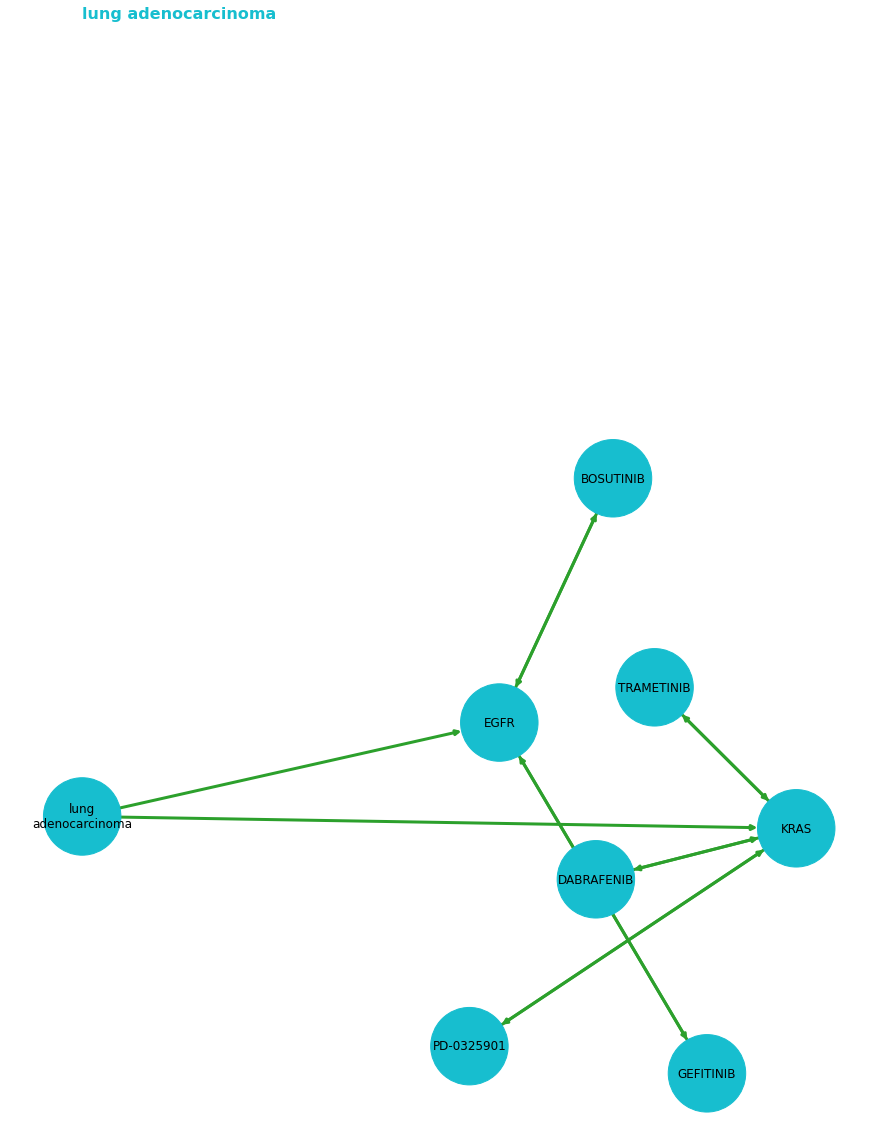

In [7]:
res = display_graph(df1)

## Use Case 2: Mutations in what genes cause sensitivity to drug Y in patients with pancreatic adenocarcinoma

In [27]:
paad = ht.query("MONDO:0006047")['Disease'][0]
paad

{'MONDO': 'MONDO:0006047',
 'DOID': 'DOID:4074',
 'UMLS': 'C0281361',
 'name': 'pancreatic adenocarcinoma',
 'primary': {'identifier': 'MONDO',
  'cls': 'Disease',
  'value': 'MONDO:0006047'},
 'display': 'MONDO(MONDO:0006047) DOID(DOID:4074) UMLS(C0281361) name(pancreatic adenocarcinoma)',
 'type': 'Disease'}

In [28]:
query_config = {
    "filters": [
        {
            "frequency": {
                ">": 0.1
            },
        }, 
        {
            "disease_context": {
                "=": "MONDO:0006047"
            },
            "pvalue": {
                "<": 0.05
            },
            "effect_size": {
                "<": 0.00
            }
        }
    ],
    "predicates": [None, None, "physically_interacts_with"]
}

In [37]:
pd = Predict([paad], ['Gene', 'ChemicalSubstance'], ['Gene'], config=query_config)
pd.connect(verbose=True)

========== QUERY PARAMETER SUMMARY ==========

Your query have 1 input nodes pancreatic adenocarcinoma. And BTE will find paths that connect your input nodes to your output types ['Gene']. Paths will contain 2 intermediate nodes.

Intermediate node #1 will have these type constraints: Gene
Intermediate node #2 will have these type constraints: ChemicalSubstance

========== Query # 1 ==========

==== Step #1: Query Path Planning ====

BTE found 10 APIs

API 1. TCGA Mutation Frequency KP API (1 API calls)
API 2. Automat CORD19 Scigraph API (1 API calls)
API 3. mydisease.info API (1 API calls)
API 4. SEMMED Disease API (15 API calls)
API 5. MGIgene2phenotype API (1 API calls)
API 6. Automat CORD19 Scibite API (1 API calls)
API 7. BioLink API (2 API calls)
API 8. Automat PHAROS API (1 API calls)
API 9. DISEASES API (1 API calls)
API 10. CORD Disease API (1 API calls)


==== Step #2: Query path execution ====

NOTE: API requests are dispatched in parallel, so the list of APIs below is order

API 12.2 DGIdb API: 20 hits
API 12.2 DGIdb API: 0 hits after applying filters
API 8.3: https://mychem.info/v1/query?fields=drugbank.id&size=250 (POST -d q=SMAD4,TP53,TTN,KRAS,CDKN2A&scopes=drugbank.targets.gene_name)
API 8.3 MyChem.info API: 12 hits
API 8.3 MyChem.info API: 0 hits after applying filters
API 6.1: https://biothings.ncats.io/cord_gene/query?fields=associated_with (POST -d q=11998,12403,6770,1787,6407&scopes=hgnc)
API 1.1 BioThings DGIdb API: 385 hits
API 1.1 BioThings DGIdb API: 0 hits after applying filters
API 11.1: https://biothings.ncats.io/semmedgene/query?fields=affects (POST -d q=C1421222,C0079419,C0694891,C1537502,C0146283,C0525037&scopes=umls)
API 2.2: https://biothings.ncats.io/drug_response_kp/query?fields=association.context.disease.mondo,object.PUBCHEM,association.effect_size,association.pvalue&q=subject.NCBIGene:3845%20AND%20association.effect_size:<0%20AND%20association.pvalue:<0.05&size=1000&sort=association.pvalue
API 2.2 Drug Response KP API: 61 hits
API

API 9.6 Automat HMDB API: 1 hits
API 9.6 Automat HMDB API: 0 hits after applying filters
API 9.7: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:7273
API 9.7 Automat HMDB API: 0 hits
API 9.7 Automat HMDB API: 0 hits after applying filters
API 10.7: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:7157
API 10.7: https://automat.renci.org/chembio/gene/chemical_substance/NCBIGene:1029
API 10.7 Automat CHEMBIO API: 12 hits
API 10.7 Automat CHEMBIO API: 0 hits after applying filters
API 4.8: https://automat.renci.org/cord19-scibite/gene/chemical_substance/NCBIGene:7157
API 4.8 Automat CORD19 Scibite API: 11 hits
API 4.8 Automat CORD19 Scibite API: 0 hits after applying filters
API 9.8: https://automat.renci.org/hmdb/gene/chemical_substance/NCBIGene:7157
API 9.8 Automat HMDB API: 0 hits
API 9.8 Automat HMDB API: 0 hits after applying filters
API 3.5: https://automat.renci.org/cord19-scigraph/gene/chemical_substance/NCBIGene:1029
API 3.5 Automat CORD19 Scigr

API 4.6 DGIdb API: 1 hits
API 4.6 DGIdb API: 1 hits after applying filters
API 4.7: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL3752910
API 4.7 DGIdb API: 0 hits
API 4.7 DGIdb API: 0 hits after applying filters
API 4.8: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL583042
API 4.8 DGIdb API: 0 hits
API 4.8 DGIdb API: 0 hits after applying filters
API 4.9: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL4125960
API 4.9 DGIdb API: 0 hits
API 4.9 DGIdb API: 0 hits after applying filters
API 4.10: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL1090479
API 4.10 DGIdb API: 3 hits
API 4.10 DGIdb API: 3 hits after applying filters
API 4.11: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL1230609
API 4.11 DGIdb API: 14 hits
API 4.11 DGIdb API: 14 hits after applying filters
API 4.12: http://dgidb.genome.wustl.edu/api/v2/interactions.json?drugs=CHEMBL1236962
API 4.12 DGIdb API: 19 hits
API 4.12 D

In [38]:
df1 = pd.display_table_view()
df1

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,...,node2_type,node2_degree,pred3,pred3_source,pred3_api,pred3_publications,output_id,output_label,output_type,output_degree
0,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,CGI,BioThings DGIdb API,None,NCBIGene:2539,G6PD,Gene,None
1,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,CKB,BioThings DGIdb API,PMID:27659046,NCBIGene:7157,TP53,Gene,None
2,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,CancerCommons,BioThings DGIdb API,None,NCBIGene:673,BRAF,Gene,None
3,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,CKB,BioThings DGIdb API,PMID:27500726,NCBIGene:10735,STAG2,Gene,None
4,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:7157,TP53,Gene,...,ChemicalSubstance,None,physically_interacts_with,GuideToPharmacologyInteractions,BioThings DGIdb API,None,NCBIGene:673,BRAF,Gene,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1029,CDKN2A,Gene,...,ChemicalSubstance,None,physically_interacts_with,"MyCancerGenome,TdgClinicalTrial,ChemblInteract...",DGIdb API,None,NCBIGene:2339,FNTA,Gene,None
372,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1029,CDKN2A,Gene,...,ChemicalSubstance,None,physically_interacts_with,NCI,DGIdb API,None,NCBIGene:2064,ERBB2,Gene,None
373,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1029,CDKN2A,Gene,...,ChemicalSubstance,None,physically_interacts_with,CGI,DGIdb API,None,NCBIGene:3265,HRAS,Gene,None
374,MONDO:0006047,pancreatic adenocarcinoma,Disease,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TCGA Mutation Frequency KP API,None,NCBIGene:1029,CDKN2A,Gene,...,ChemicalSubstance,None,physically_interacts_with,CGI,DGIdb API,None,NCBIGene:4763,NF1,Gene,None


In [39]:
df2 = df1.query("node1_id == output_id").drop_duplicates()
df2[["input_label", "pred1", "pred1_source", "node1_label", "pred2", "pred2_source", "node2_label", "pred3", "pred3_source", "output_label"]]

,input_label,pred1,pred1_source,node1_label,pred2,pred2_source,node2_label,pred3,pred3_source,output_label
1,pancreatic adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TP53,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,DABRAFENIB,physically_interacts_with,CKB,TP53
45,pancreatic adenocarcinoma,gene_has_variant_that_contributes_to_disease_a...,Multiomics Provider,TP53,gene_has_variant_that_contributes_to_drug_resp...,Multiomics Provider,DABRAFENIB,physically_interacts_with,CKB,TP53
